Scalable dataset

In [125]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [153]:
#extract
sp500_url = 'https://datahub.io/core/s-and-p-500-companies/r/0.html'
data_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers = data_table[0][0:10]['Symbol'].values
source = 'yahoo'
start_date = '2022-01-01'
end_date = '2022-03-01'

data = web.DataReader(tickers, source, start_date, end_date)

In [127]:
#transform
stock_close = np.array(data['Close']).T
stock_open = np.array(data['Open']).T

row, col = stock_close.shape

stock_diff = np.zeros([row, col])

for i in range(0, row):
    stock_diff[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [128]:
#pipeline + model
normalizer = Normalizer()
kmeans = KMeans(n_clusters=3, max_iter=1000)

pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(stock_diff)

cluster = pipeline.predict(stock_diff)

df = pd.DataFrame({'cluster': cluster, 'stock': tickers})

# display df sorted by cluster labels
print(df.sort_values('cluster'))

   cluster empresa
0        0     MMM
1        0     AOS
9        0     ADP
3        1    ABBV
7        1     ADM
2        2     ABT
4        2    ABMD
5        2     ACN
6        2    ATVI
8        2    ADBE


In [150]:
#reduced data
reduced_data = PCA(n_components = 2).fit_transform(normalizer.fit_transform(stock_diff))
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

<Figure size 432x288 with 0 Axes>

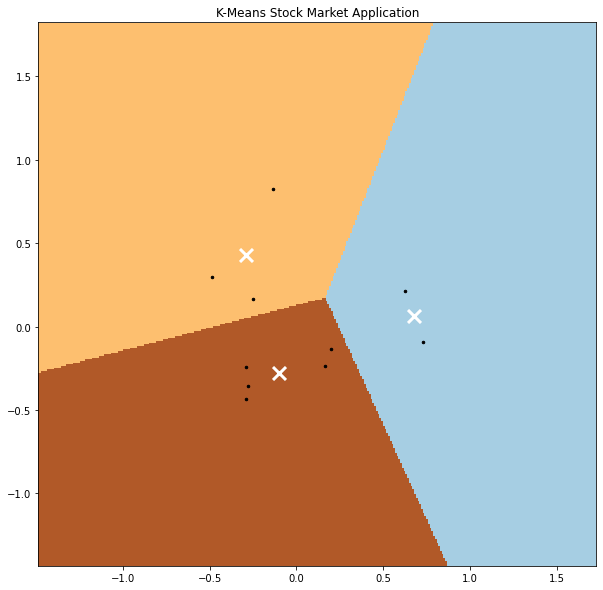

In [151]:
#plot
h = 0.01

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Stock Market Application')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()